# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
1,11,90,34,66,136,55,6,123,54,17,118,148,224,118,65,5,26,196,202
2,101,95,42,85,174,66,9,153,44,19,144,168,347,150,65,11,5,196,204
3,396,108,57,106,177,51,5,256,26,28,170,285,966,261,87,11,2,182,181
4,668,94,46,91,175,70,12,157,43,20,155,172,358,192,69,15,21,190,200
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,839,90,44,72,157,64,8,137,48,18,144,159,283,171,65,9,4,196,203
7,671,103,41,83,194,63,9,175,38,21,142,199,455,138,65,7,30,197,206
8,103,92,38,60,130,62,5,114,58,17,132,135,194,137,72,14,5,190,194
9,81,99,51,92,203,65,5,209,31,24,159,232,671,214,78,5,11,191,189


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.87796,93.770492,44.766849,82.032787,169.205829,61.737705,8.437158,168.411658,40.969035,20.540984,147.799636,187.943534,437.273224,173.923497,72.182149,6.455373,12.515483,189.147541,195.927140
std,247.62536,8.197280,6.077984,15.794842,33.327115,7.218214,3.892038,32.624634,7.699947,2.546763,14.423468,30.506708,172.644211,31.966131,7.099371,4.900498,8.991594,6.236672,7.480276
min,0.00000,77.000000,33.000000,44.000000,104.000000,48.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,215.00000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,423.00000,93.000000,44.000000,79.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,637.00000,100.000000,49.000000,98.000000,196.000000,66.000000,10.000000,198.000000,46.000000,23.000000,158.000000,216.000000,586.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.00000,116.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

from sklearn import datasets

import warnings
warnings.simplefilter('ignore')


%matplotlib inline

matplotlib.rcParams['figure.figsize'] = 11.7, 8.27

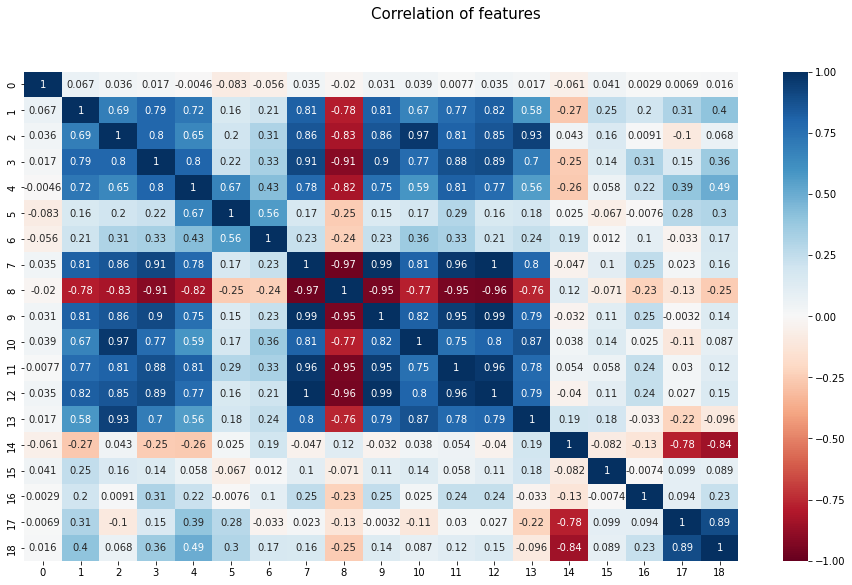

In [7]:
# Таблица корреляции фичей

def correlation(X_train, size=(16, 9)):
    fig, ax = plt.subplots(1, 1, figsize=size)
    fig.suptitle('Correlation of features', fontsize=15)

    sns.heatmap(X_train.corr(),
               vmin=-1, vmax=1, annot=True, cmap='RdBu')

    plt.show()

correlation(X_train_pd)

In [8]:
# Дропаем сильно скоррелированные признаки

#X_train_dropped = X_train_pd.drop(columns=[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17, 5, 18])
#X_test_dropped = X_test_pd.drop(columns=[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17, 5, 18])

#X_train_dropped = X_train_pd.drop(columns=[1, 2, 3, 4, 7, 9, 8, 10, 13, 14])
#X_test_dropped = X_test_pd.drop(columns=[1, 2, 3, 4, 7, 9, 8, 10, 13, 14])

#X_train_dropped = X_train_pd
#X_test_dropped = X_test_pd

#X_train_dropped = X_train_pd.drop(columns=[2, 4, 7, 9, 10, 11, 17])
#X_test_dropped = X_test_pd.drop(columns=[2, 4, 7, 9, 10, 11, 17])

X_train_dropped = X_train_pd.drop(columns=[2, 3, 7, 8, 11, 12, 18])
X_test_dropped = X_test_pd.drop(columns=[2, 3, 7, 8, 11, 12, 18])

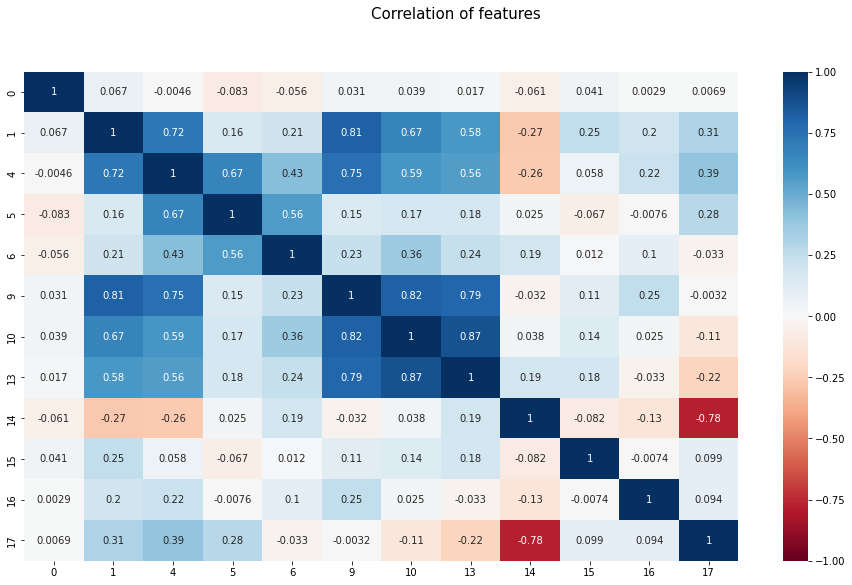

In [9]:
correlation(X_train_dropped)

In [10]:
# Уникальные значения меток
for column in y_train_pd.columns:
    print(f'{y_train_pd[column].unique()} - {len(y_train_pd[column].unique())}')

['opel' 'saab' 'van' 'bus'] - 4


In [11]:
# Оценим сбаллансированность выборки (выборка сбаллансирована)

print(y_train_pd[0].value_counts())

bus     147
saab    142
van     132
opel    128
Name: 0, dtype: int64


In [12]:
# Преобразуем категориальные метки в бинарную матрицу
y_train_binary = pd.get_dummies(y_train_pd)
y_test_binary = pd.get_dummies(y_test_pd)
y_train_binary

,0_bus,0_opel,0_saab,0_van
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
544,0,0,1,0
545,0,0,0,1
546,0,0,0,1
547,0,0,0,1


model score on training data: 0.9363189453762591
model score on testing data: 0.5792862844521651


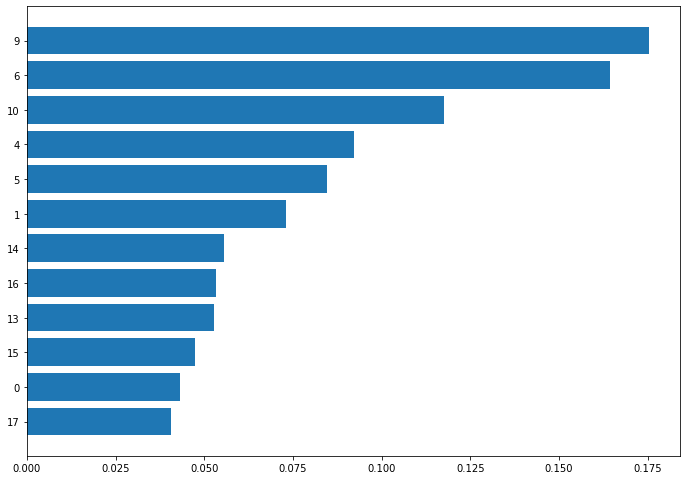

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Значимость фичей с дропом
model1 = RandomForestRegressor()

model1.fit(X_train_dropped, y_train_binary)

print(f'model score on training data: {model1.score(X_train_dropped, y_train_binary)}')
print(f'model score on testing data: {model1.score(X_test_dropped, y_test_binary)}')

importances = model1.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_dropped.columns)[indices])

model score on training data: 0.9373572640260726
model score on testing data: 0.5888855646712589


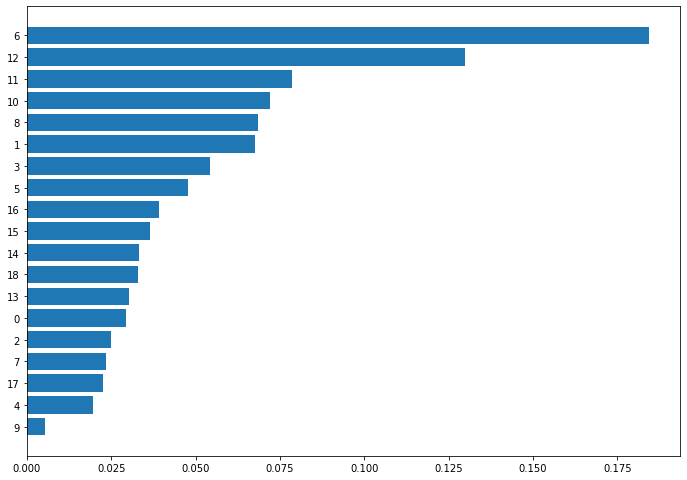

In [14]:
# Значимость фичей без дропа
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(X_train_pd, y_train_binary)

print(f'model score on training data: {model2.score(X_train_pd, y_train_binary)}')
print(f'model score on testing data: {model2.score(X_test_pd, y_test_binary)}')

importances = model2.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_pd.columns)[indices])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [15]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import scikitplot

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

In [17]:
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'], 
    'multi_class': ['multinomial'],
    'max_iter': [500],
    #'C': np.arange(1e-3, 1e-2, 1e-4),
    'C': np.arange(1e-3, 5e-3, 1e-4),
    'tol' : [1e-3]
}
model = LR()

gsc = GridSearchCV(model, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_train_dropped, y_train_pd)
print(gsc.best_params_)

{'C': 0.004400000000000001, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


              precision    recall  f1-score   support

         bus       0.54      0.77      0.64        71
        opel       0.63      0.39      0.49        84
        saab       0.46      0.44      0.45        75
         van       0.82      0.90      0.86        67

    accuracy                           0.61       297
   macro avg       0.62      0.63      0.61       297
weighted avg       0.61      0.61      0.60       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

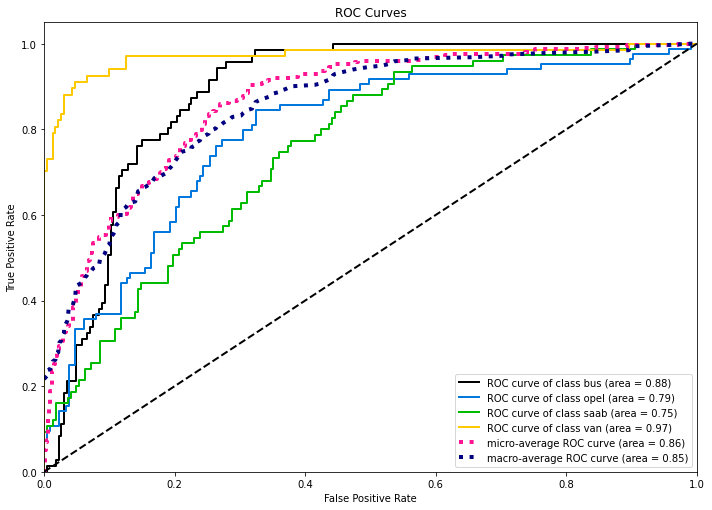

In [18]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
#!pip install scikit-plot

model_LR = LR(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.0044, penalty='l2')
model_LR.fit(X_train_dropped, y_train_pd)
y_hat = model_LR.predict(X_test_dropped)
probs = model_LR.predict_proba(X_test_dropped)
print(classification_report(y_test_pd, y_hat))
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [19]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train_dropped)

In [21]:
X_train_dropped_scaled = scaler.transform(X_train_dropped)
X_test_dropped_scaled = scaler.transform(X_test_dropped)

{'pca__n_components': 11, 'pca__power_iteration_normalizer': 'auto', 'pca__svd_solver': 'auto'}


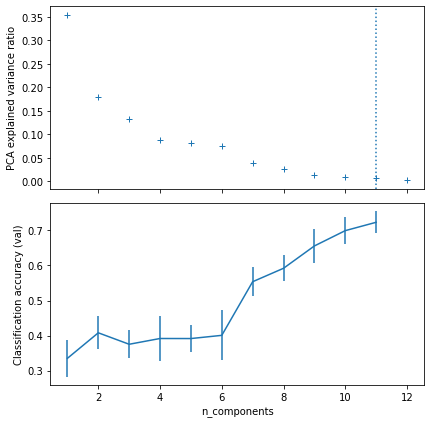

In [22]:
# Подбираем параметры для PCA
pca = PCA()
model_LR_on_PCA = LR()

pipe = Pipeline(steps=[("pca", pca), ("logistic", model_LR_on_PCA)])
param_grid = {
    'pca__n_components': range(1, 12), 
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'], 
    'pca__power_iteration_normalizer': ['auto', 'QR', 'LU', 'none']
}

gsc = GridSearchCV(pipe, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_train_dropped_scaled, y_train_pd)
print(gsc.best_params_)


pca.fit(X_train_dropped_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")
ax0.axvline(
    gsc.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
results = pd.DataFrame(gsc.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.tight_layout()

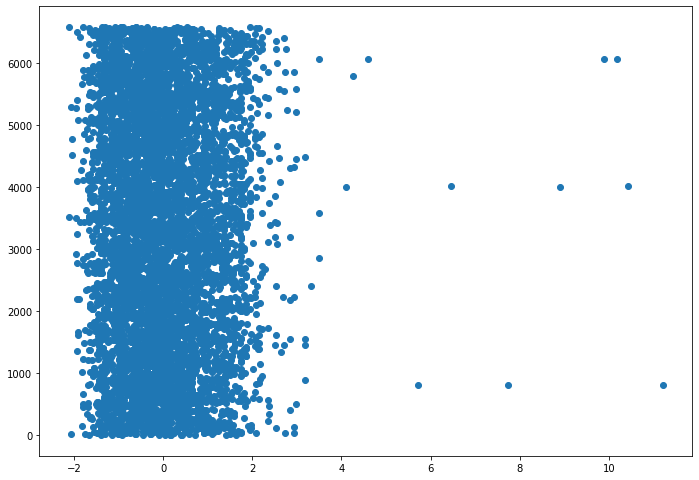

In [23]:
plt.scatter(X_train_dropped_scaled, range(X_train_dropped_scaled.shape[0] * X_train_dropped_scaled.shape[1]))

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [24]:
pca = PCA(n_components=11, power_iteration_normalizer='auto', svd_solver='auto')
pca.fit(X_train_dropped_scaled, y_train_pd)
X_new_train = pca.transform(X_train_dropped_scaled)
X_new_test = pca.transform(X_test_dropped_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [29]:
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'], 
    'multi_class': ['multinomial'],
    'C': np.arange(1e-1, 1, 1e-2),
    'tol' : [1e-3],
    'max_iter': np.arange(200, 700, 50)
}
model = LR()

gsc = GridSearchCV(model, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_new_train, y_train_pd)
print(gsc.best_params_)

{'C': 0.24999999999999992, 'max_iter': 400, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


In [39]:
# Preparing a model
# Параметры, подобранные из предыдущих прогонок подходят лучше
model_LR_on_PCA = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=200)
model_LR_on_PCA.fit(X_new_train, y_train)

LogisticRegression(C=0.67, max_iter=200, multi_class='multinomial',
                   solver='saga', tol=0.001)

              precision    recall  f1-score   support

         bus       0.74      0.93      0.82        71
        opel       0.64      0.49      0.55        84
        saab       0.58      0.57      0.58        75
         van       0.91      0.96      0.93        67

    accuracy                           0.72       297
   macro avg       0.72      0.74      0.72       297
weighted avg       0.71      0.72      0.71       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

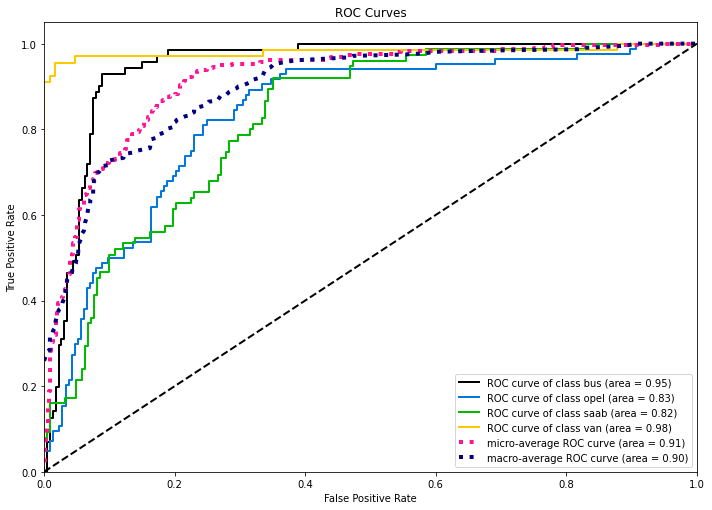

In [40]:
# Predicting and drawing graph and metrics
y_hat_pca = model_LR_on_PCA.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_pca))
probs = model_LR_on_PCA.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
params ={'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(1, 10),
        'splitter':['best', 'random']
        }
model = DecisionTreeClassifier()

gs = GridSearchCV(model, params, cv=kf, n_jobs=-1)
gs.fit(X_new_train, y_train_pd)

gs.best_params_

{'criterion': 'log_loss', 'max_depth': 6, 'splitter': 'best'}

              precision    recall  f1-score   support

         bus       0.88      0.82      0.85        71
        opel       0.54      0.36      0.43        84
        saab       0.46      0.57      0.51        75
         van       0.70      0.85      0.77        67

    accuracy                           0.63       297
   macro avg       0.64      0.65      0.64       297
weighted avg       0.64      0.63      0.63       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

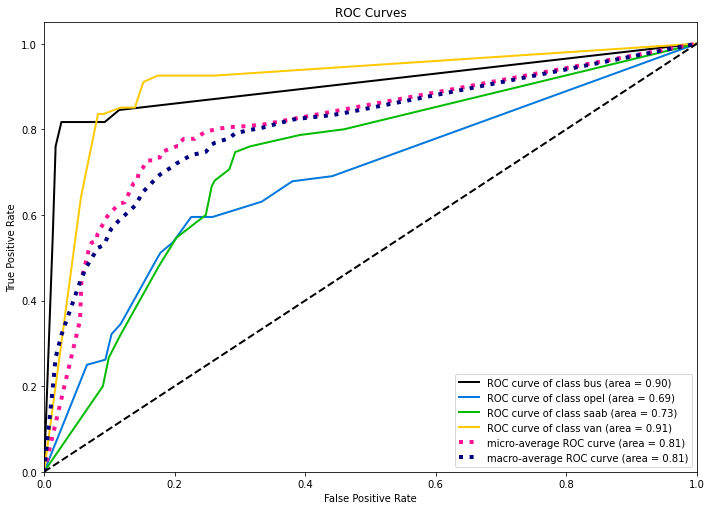

In [107]:
model = DecisionTreeClassifier(max_depth=6, criterion='log_loss', splitter='best')
model.fit(X_new_train, y_train)

y_hat_tree = model.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_tree))
probs = model.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [109]:
from numpy import mean
from numpy import std

In [110]:
num_algos = [N for N in range(2, 101, 5)]
num_algos.append(100)
models = dict()
b_model1 = DecisionTreeClassifier(max_depth=6, criterion='log_loss', splitter='best')
b_model2 = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=200)

num_of_est: 2 mean_acc: 0.6375757575757576 f1_mean: 0.6101619240054964
num_of_est: 7 mean_acc: 0.6612457912457912 f1_mean: 0.6492429189359787
num_of_est: 12 mean_acc: 0.6703367003367003 f1_mean: 0.6613532344960956
num_of_est: 17 mean_acc: 0.6771464646464647 f1_mean: 0.6729150287031896
num_of_est: 22 mean_acc: 0.6823501683501683 f1_mean: 0.6746376619467792
num_of_est: 27 mean_acc: 0.6864197530864197 f1_mean: 0.678544451990403
num_of_est: 32 mean_acc: 0.6898412698412698 f1_mean: 0.6819262384947462
num_of_est: 37 mean_acc: 0.6933122895622896 f1_mean: 0.6830766666578751
num_of_est: 42 mean_acc: 0.6943995510662176 f1_mean: 0.686396863746124
num_of_est: 47 mean_acc: 0.6970841750841753 f1_mean: 0.6887226089056305
num_of_est: 52 mean_acc: 0.6977992041628408 f1_mean: 0.6896556224780475
num_of_est: 57 mean_acc: 0.6991498316498317 f1_mean: 0.6908638654010351
num_of_est: 62 mean_acc: 0.7004299404299403 f1_mean: 0.6913448291901942
num_of_est: 67 mean_acc: 0.7016618566618567 f1_mean: 0.6923475060161

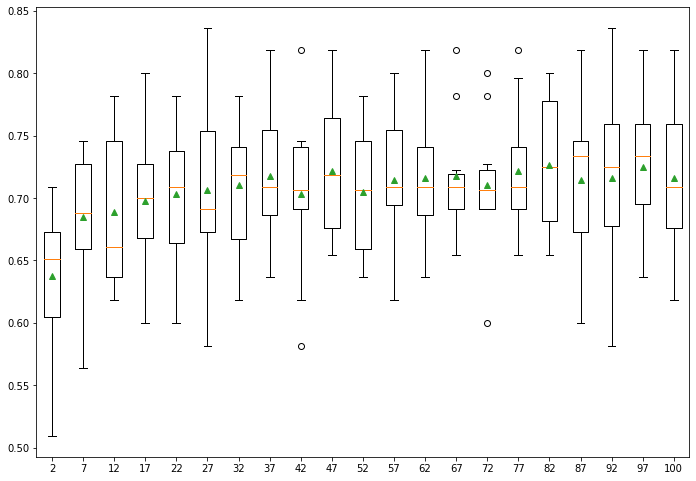

In [239]:
for n in num_algos:
    models[str(n)] = BaggingClassifier(base_estimator=b_model1, n_estimators=n)


accs, f1s, names = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    #model.fit(X_new_train, y_train)
    #y_pred = model.predict(X_new_test)
    scores = cross_val_score(model, X_new_train, y_train_pd, scoring='accuracy', cv=kf, n_jobs=-1)
    f1 = cross_val_score(model, X_new_train, y_train_pd, scoring=make_scorer(f1_score, average='macro'), cv=kf, n_jobs=-1)
    # store the results
    f1s.append(f1)
    accs.append(scores)
    
    #results.append([accuracy, f1])
    names.append(name)
    # summarize the performance along the way
    print('num_of_est:', name, 'mean_acc:', mean(accs), 'f1_mean:', mean(f1s))
    
# plot model performance for comparison
plt.boxplot(accs, labels=names, showmeans=True)
plt.show()

In [240]:
np.array(f1s).shape

(21, 10)

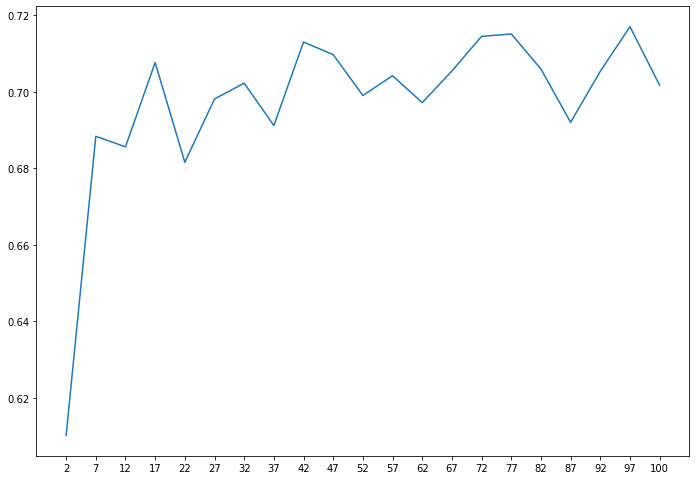

In [241]:
plt.plot(names, mean(f1s, axis=1))
plt.show()
# на 47 выходит на полочку

num_of_est: 2 mean_acc: 0.7268686868686868 f1_mean: 0.7218792699376705
num_of_est: 7 mean_acc: 0.7241077441077441 f1_mean: 0.7183205977152107
num_of_est: 12 mean_acc: 0.7268462401795736 f1_mean: 0.7186094368756365
num_of_est: 17 mean_acc: 0.7281986531986533 f1_mean: 0.7197773201797608
num_of_est: 22 mean_acc: 0.7293804713804714 f1_mean: 0.7200061874725173
num_of_est: 27 mean_acc: 0.7280415263748596 f1_mean: 0.720890670137353
num_of_est: 32 mean_acc: 0.7286483886483885 f1_mean: 0.7208218312048166
num_of_est: 37 mean_acc: 0.7293308080808082 f1_mean: 0.7205906763645711
num_of_est: 42 mean_acc: 0.7294537972315751 f1_mean: 0.7214023248078667
num_of_est: 47 mean_acc: 0.7295555555555556 f1_mean: 0.72163765606097
num_of_est: 52 mean_acc: 0.7302999693908785 f1_mean: 0.7209199614347643
num_of_est: 57 mean_acc: 0.7301599326599326 f1_mean: 0.7209754653413973
num_of_est: 62 mean_acc: 0.7304636104636105 f1_mean: 0.7213710728253816
num_of_est: 67 mean_acc: 0.7303318903318903 f1_mean: 0.72101062330488

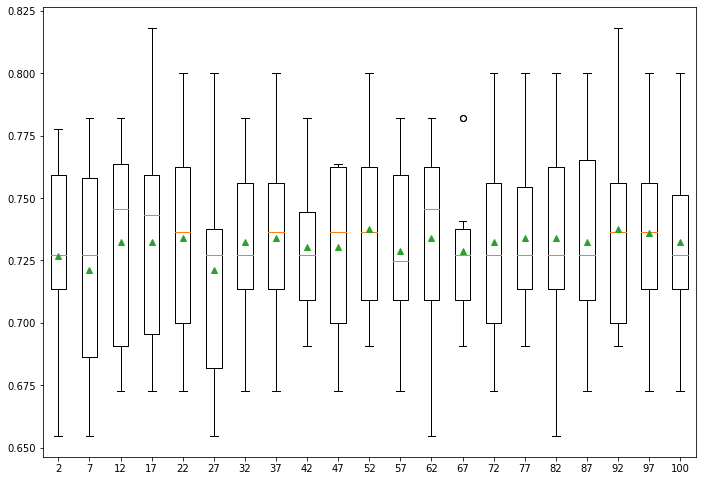

In [242]:
models = dict()
for n in num_algos:
    models[str(n)] = BaggingClassifier(base_estimator=b_model2, n_estimators=n)

accs, f1s, names = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    #model.fit(X_new_train, y_train)
    #y_pred = model.predict(X_new_test)
    scores = cross_val_score(model, X_new_train, y_train_pd, scoring='accuracy', cv=10, n_jobs=-1)
    f1 = cross_val_score(model, X_new_train, y_train_pd, scoring=make_scorer(f1_score, average='macro'), cv=10, n_jobs=-1)
    # store the results
    f1s.append(f1)
    accs.append(scores)
    
    #results.append([accuracy, f1])
    names.append(name)
    # summarize the performance along the way
    print('num_of_est:', name, 'mean_acc:', mean(accs), 'f1_mean:', mean(f1s))
    
# plot model performance for comparison
plt.boxplot(accs, labels=names, showmeans=True)
plt.show()

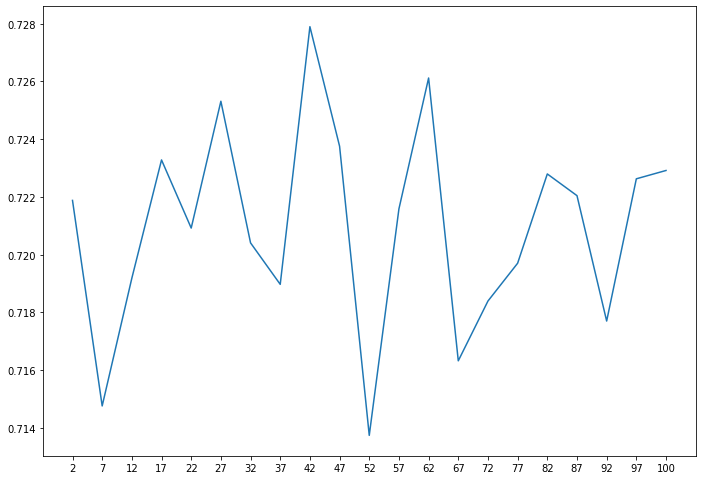

In [244]:
plt.plot(names, mean(f1s, axis=1))
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [245]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [246]:
params ={'criterion': ['gini', 'entropy', 'log_loss'],
        'n_estimators': num_algos,
        'max_depth': range(5, 10),
        }
model = RandomForestClassifier()

gs = GridSearchCV(model, params, n_jobs=-1, cv=kf)
gs.fit(X_new_train, y_train_pd)

gs.best_params_
# n_estimators = количеству decision trees в bagging

{'criterion': 'log_loss', 'max_depth': 8, 'n_estimators': 47}

              precision    recall  f1-score   support

         bus       0.84      0.97      0.90        71
        opel       0.65      0.54      0.59        84
        saab       0.58      0.56      0.57        75
         van       0.81      0.90      0.85        67

    accuracy                           0.73       297
   macro avg       0.72      0.74      0.73       297
weighted avg       0.72      0.73      0.72       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

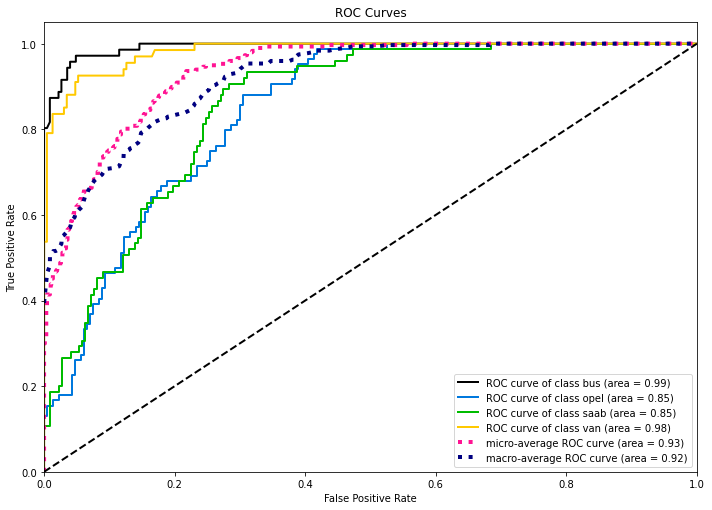

In [253]:
model = RandomForestClassifier(max_depth=8, criterion='log_loss', n_estimators=47)
model.fit(X_new_train, y_train_pd)

y_hat_forest = model.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_forest))
probs = model.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [254]:
from sklearn.metrics import accuracy_score

In [277]:
# YOUR CODE HERE
splits = []
for i in range(1, 10):
    res = X_new_train.shape[0] // 10 * i
    splits.append(res)

splits.append(X_new_train.shape[0] + 1)

optim_lr = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=350)
optim_dt = DecisionTreeClassifier(max_depth=8, criterion='gini', splitter='best')
optim_rf = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=62)

accs, f1s = list(), list()

for i, split in enumerate(splits):
    
    optim_lr.fit(X_new_train[0:split], y_train[0:split])
    optim_dt.fit(X_new_train[0:split], y_train[0:split])
    optim_rf.fit(X_new_train[0:split], y_train[0:split])
    
    y_lr = optim_lr.predict(X_new_test)
    y_dt = optim_dt.predict(X_new_test)
    y_rf = optim_rf.predict(X_new_test)
    
    accs.append([accuracy_score(y_test_pd, y_lr), accuracy_score(y_test_pd, y_dt), accuracy_score(y_test_pd, y_rf)])
    f1s.append([f1_score(y_test_pd, y_lr, average='macro'), f1_score(y_test_pd, y_dt, average='macro'), f1_score(y_test_pd, y_rf, average='macro')])

    #print('______________________________', i + 1, ' split________________________________', sep='')
    #print('Log_Reg:\n', classification_report(y_test_pd, y_lr))
    #print('Dec_Tree:\n', classification_report(y_test_pd, y_dt))
    #print('Ran_For:\n', classification_report(y_test_pd, y_rf))
    #print('_____________________________________________________________________\n')
    
    
    print('______________________________', i + 1, ' split________________________________', sep='')
    print('Log_Reg:\n', 'accuracy: ', accuracy_score(y_test_pd, y_lr), '\nf1: ', f1_score(y_test_pd, y_lr, average='macro'), '\n', sep='')
    print('Dec_Tree:\n', 'accuracy: ', accuracy_score(y_test_pd, y_dt), '\nf1: ', f1_score(y_test_pd, y_dt, average='macro'), '\n', sep='')
    print('Ran_For:\n', 'accuracy: ', accuracy_score(y_test_pd, y_rf), '\nf1: ', f1_score(y_test_pd, y_rf, average='macro'), '\n', sep='')
    print('_____________________________________________________________________\n')

______________________________1 split________________________________
Log_Reg:
accuracy: 0.6161616161616161
f1: 0.6113134000156757

Dec_Tree:
accuracy: 0.5218855218855218
f1: 0.5202968989435406

Ran_For:
accuracy: 0.6026936026936027
f1: 0.5944665965263971

_____________________________________________________________________

______________________________2 split________________________________
Log_Reg:
accuracy: 0.6262626262626263
f1: 0.6188588890752231

Dec_Tree:
accuracy: 0.5387205387205387
f1: 0.5486315260636226

Ran_For:
accuracy: 0.6397306397306397
f1: 0.6233676065683886

_____________________________________________________________________

______________________________3 split________________________________
Log_Reg:
accuracy: 0.6632996632996633
f1: 0.6614865070120062

Dec_Tree:
accuracy: 0.5454545454545454
f1: 0.5446876005312276

Ran_For:
accuracy: 0.6632996632996633
f1: 0.6606346826586706

_____________________________________________________________________

________________

In [278]:
accs = np.array(accs)
f1s = np.array(f1s)

In [279]:
#accs = np.flip(accs)
#f1s = np.flip(f1s)

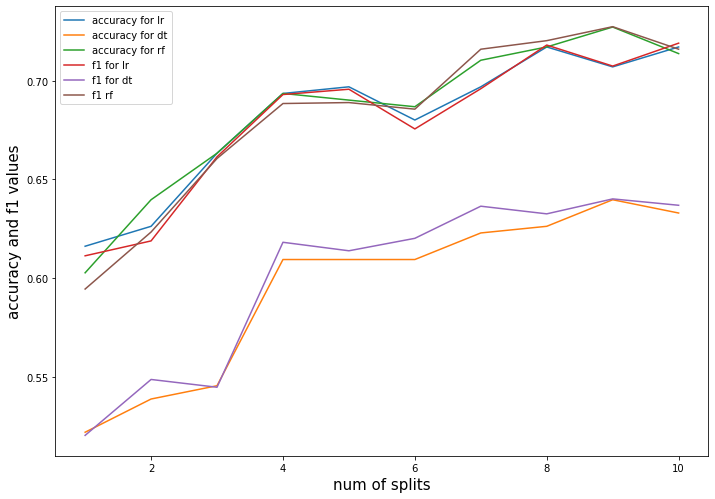

In [287]:
plt.plot(range(1, 11), accs[:, 0], label = "accuracy for lr")
plt.plot(range(1, 11), accs[:, 1], label = "accuracy for dt")
plt.plot(range(1, 11), accs[:, 2], label = "accuracy for rf")

plt.plot(range(1, 11), f1s[:, 0], label = "f1 for lr")
plt.plot(range(1, 11), f1s[:, 1], label = "f1 for dt")
plt.plot(range(1, 11), f1s[:, 2], label = "f1 rf")

plt.xlabel("num of splits", fontsize=15)
plt.ylabel("accuracy and f1 values", fontsize=15)
plt.legend()
plt.show()

## Вывод: с увеличением размера Train выборки f1_score и accuracy_score растет